In [1]:
from scipy.stats import uniform
import matplotlib.pyplot as plt
from numpy import random
import numpy as np
from scipy.optimize import minimize_scalar

In [2]:
# Q1:

def simulate(n):
    x0 = random.uniform(0, 2/n)
    y0 = random.uniform(0, 2/n)
    x, y = [x0], [y0]
    for i in range(n-1):
        x0 = x0 + random.uniform(0, 2/n)
        y0 = y0 + random.uniform(0, 2/n)
        x.append(x0 if x0 < 1 else 1)
        y.append(y0 if y0 < 1 else 1)
    return x,y

In [3]:
x,y = simulate(n=5)
print(x,y)

[0.3532304860170964, 0.5955605870067793, 0.6530225642278875, 1, 1] [0.3434013790079416, 0.47392782075823947, 0.7881639575451237, 0.8437864016834903, 0.9650650823905068]


In [4]:
print(x)

[0.3532304860170964, 0.5955605870067793, 0.6530225642278875, 1, 1]


I'm not entirely sure what is meant by "clipping any $z_k>1$ to the bounding box". Does it simply mean that these should be included as 1? This is what I've tried to write the function as. 

In [5]:
# Q2:
def minimize(x,y):
    x = np.array(x)
    y = np.array(y)
    def s(x0):
        x0 = np.sum(y[x<x0])+np.sum((1-y)[x>x0])
        return x0
    mini = minimize_scalar(s, method='bounded', bounds=(0,1))
    xk_star = x[x>=mini.x][0]
    yk_star = y[x>=mini.x][0]
    return xk_star,yk_star

In [6]:
minimize(x,y)

(0.6530225642278875, 0.7881639575451237)

In [7]:
# Q3: 
n_list = np.arange(10,1000,10)
y_star_list = []
for n in n_list:
    x,y = simulate(n=n)
    xk_star,yk_star = minimize(x,y)
    y_star_list.append(yk_star)

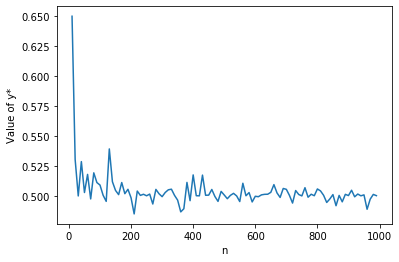

In [8]:
fig, ax = plt.subplots()
ax.plot(n_list, y_star_list)
plt.xlabel("n")
plt.ylabel("Value of y*")
plt.show()

It seems to be converging towards 0.5, which is the midpoint of the interval in which y is defined. 